In [7]:
from os import listdir

PATH = './eeg_raw_data'

file_name = []
for i in range(1, 4):
    name = listdir(f'{PATH}/{i}')
    for n in name:
        file_name.append(f'{i}/{n}')

file_name

['1/10_20151014.mat',
 '1/11_20150916.mat',
 '1/12_20150725.mat',
 '1/13_20151115.mat',
 '1/14_20151205.mat',
 '1/15_20150508.mat',
 '1/1_20160518.mat',
 '1/2_20150915.mat',
 '1/3_20150919.mat',
 '1/4_20151111.mat',
 '1/5_20160406.mat',
 '1/6_20150507.mat',
 '1/7_20150715.mat',
 '1/8_20151103.mat',
 '1/9_20151028.mat',
 '2/10_20151021.mat',
 '2/11_20150921.mat',
 '2/12_20150804.mat',
 '2/13_20151125.mat',
 '2/14_20151208.mat',
 '2/15_20150514.mat',
 '2/1_20161125.mat',
 '2/2_20150920.mat',
 '2/3_20151018.mat',
 '2/4_20151118.mat',
 '2/5_20160413.mat',
 '2/6_20150511.mat',
 '2/7_20150717.mat',
 '2/8_20151110.mat',
 '2/9_20151119.mat',
 '3/10_20151023.mat',
 '3/11_20151011.mat',
 '3/12_20150807.mat',
 '3/13_20161130.mat',
 '3/14_20151215.mat',
 '3/15_20150527.mat',
 '3/1_20161126.mat',
 '3/2_20151012.mat',
 '3/3_20151101.mat',
 '3/4_20151123.mat',
 '3/5_20160420.mat',
 '3/6_20150512.mat',
 '3/7_20150721.mat',
 '3/8_20151117.mat',
 '3/9_20151209.mat']

In [45]:
from scipy.io import loadmat

file = loadmat(f'{PATH}/{file_name[0]}')

sig = file['tyc_eeg1'][0]
fs = 1000

file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'tyc_eeg1', 'tyc_eeg2', 'tyc_eeg3', 'tyc_eeg4', 'tyc_eeg5', 'tyc_eeg6', 'tyc_eeg7', 'tyc_eeg8', 'tyc_eeg9', 'tyc_eeg10', 'tyc_eeg11', 'tyc_eeg12', 'tyc_eeg13', 'tyc_eeg14', 'tyc_eeg15', 'tyc_eeg16', 'tyc_eeg17', 'tyc_eeg18', 'tyc_eeg19', 'tyc_eeg20', 'tyc_eeg21', 'tyc_eeg22', 'tyc_eeg23', 'tyc_eeg24'])

In [46]:
import matplotlib.pyplot as plt

def plot_time(sig):
    fig, ax = plt.subplots(figsize=(50, 10))
    ax.set_title('raw data')
    ax.plot(sig)

In [96]:
file['tyc_eeg1'].shape

(62, 33601)

In [76]:
def plot(sig, data):
    fig, axs = plt.subplots(2, 1, figsize=(50, 10))
    axs[0].set_title('time')
    axs[1].set_title('frequency')
    axs.plot(sig, data)
    plt.show()

In [49]:
from scipy.fft import fft
import numpy as np

def plot_fft(sig):
    l = len(sig)
    out = fft(sig)
    out = abs(out)[:int(l/2)]
    fre = np.arange(int(l/2))*fs/l

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title('raw data')
    ax.plot(fre, 2*out/l)

In [58]:
from scipy.signal import butter, sosfilt

def butterworth(low, high):
    fs = 1000
    N = 4

    sos = butter(4, [low / fs * 2, high / fs * 2], btype='bandpass', output='sos', fs=fs)
    data = sosfilt(sos, sig)
    
    return data

In [ ]:
from mne.filter import filter_data

theta = filter_data(data=sig, sfreq=fs, l_freq=4, h_freq=8)
alpha = filter_data(data=sig, sfreq=fs, l_freq=8, h_freq=14)
beta = filter_data(data=sig, sfreq=fs, l_freq=14, h_freq=31)
gamma = filter_data(data=sig, sfreq=fs, l_freq=31, h_freq=50)


In [92]:
import numpy as np

picks = np.arange(62)
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [107]:
channels = [

              'FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 

 'F7',  'F5',  'F3',  'F1',  'FZ',  'F2',  'F4',  'F6',  'F8',

'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8',

 'T7',  'C5',  'C3',  'C1',  'CZ',  'C2',  'C4',  'C6',  'T8',

'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8',

 'P7',  'P5',  'P3',  'P1',  'PZ',  'P2',  'P4',  'P6',  'P8',

       'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 

              'CB1',  'O1',  'OZ',  'O2', 'CB2'              
          
          ]

In [110]:
from mne.filter import create_filter, filter_data
import numpy as np

picks = np.arange(62)

def filter(low, high):
    data = filter_data(data=file['tyc_eeg1'], sfreq=fs, l_freq=low, h_freq=high, verbose=False)
    # plot_time(data)
    # plot_fft(data)
    return data

In [111]:
data = filter(31, 50) # delta

In [112]:
data.shape

(62, 33601)

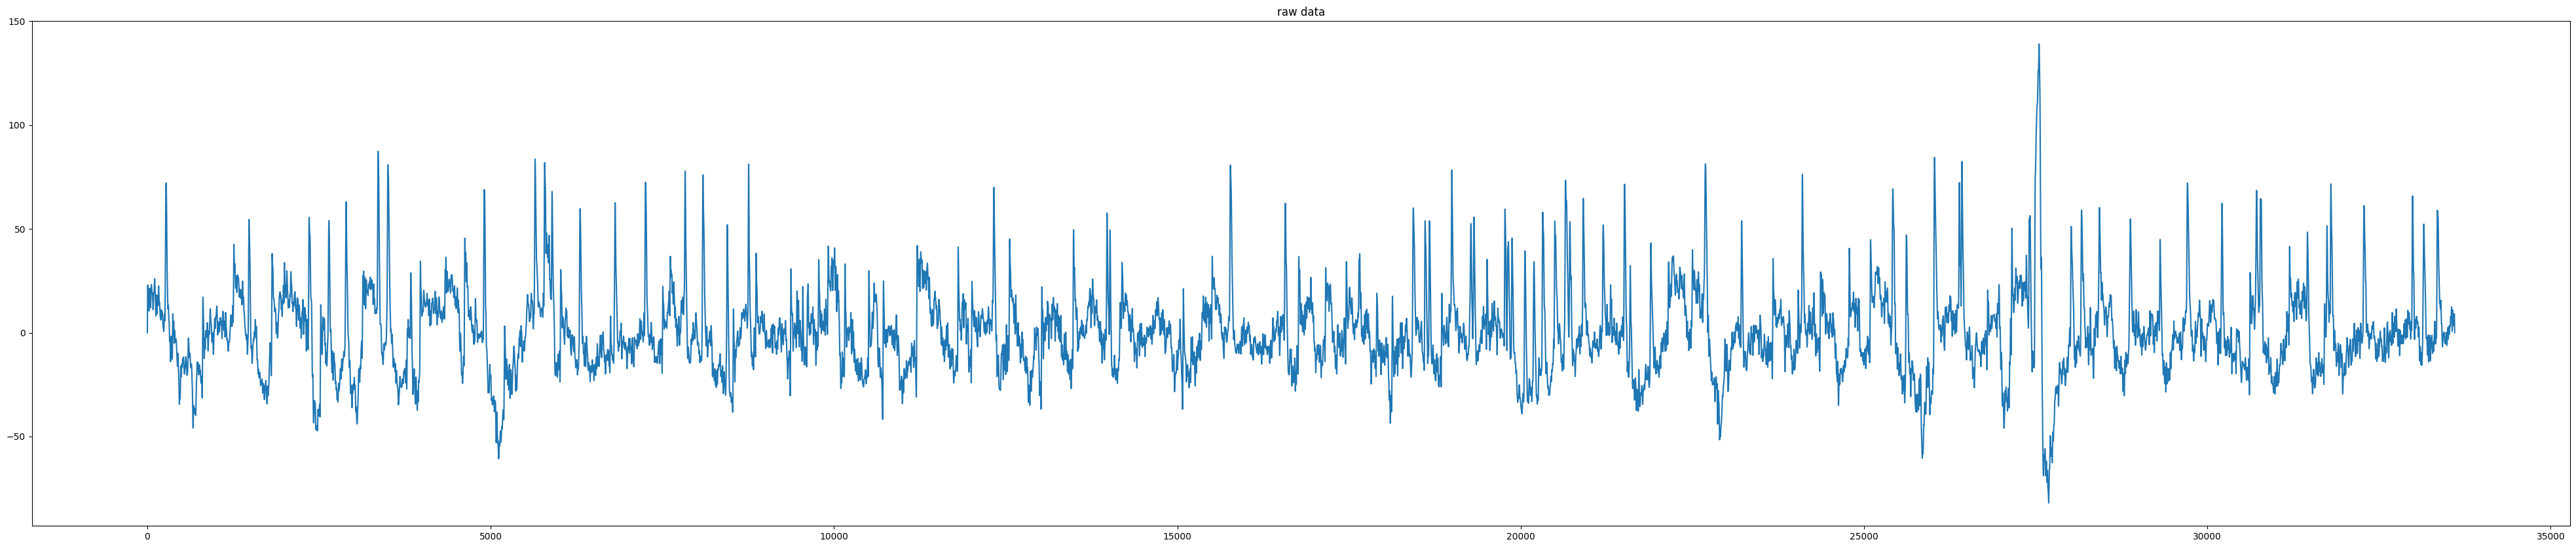

In [70]:
plot_time(data)

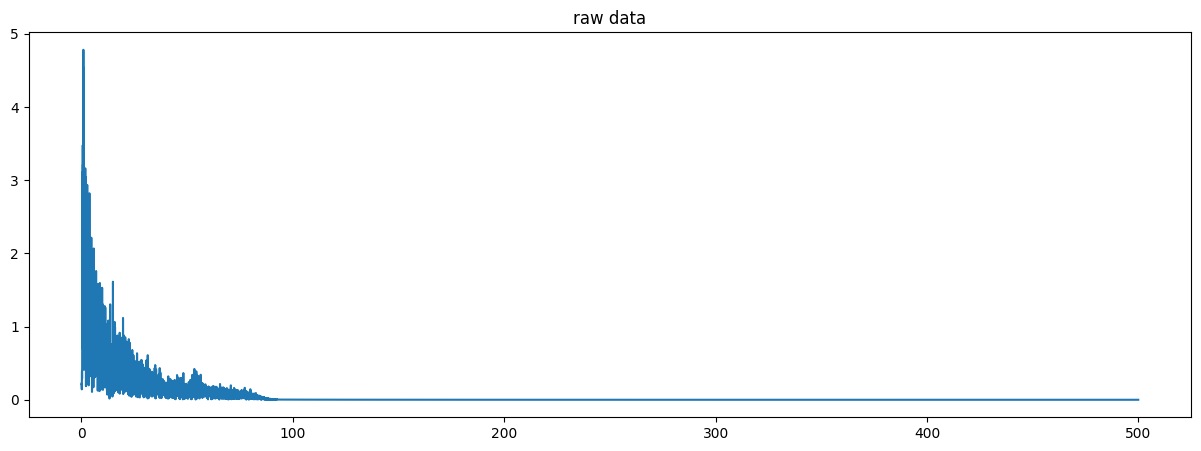

In [72]:
plot_fft(data)

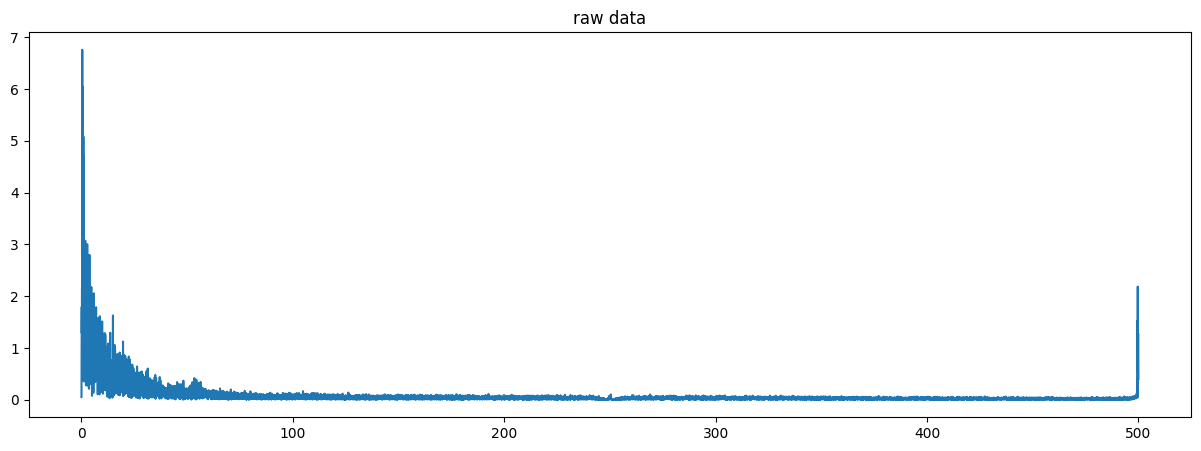

In [73]:
plot_fft(sig)

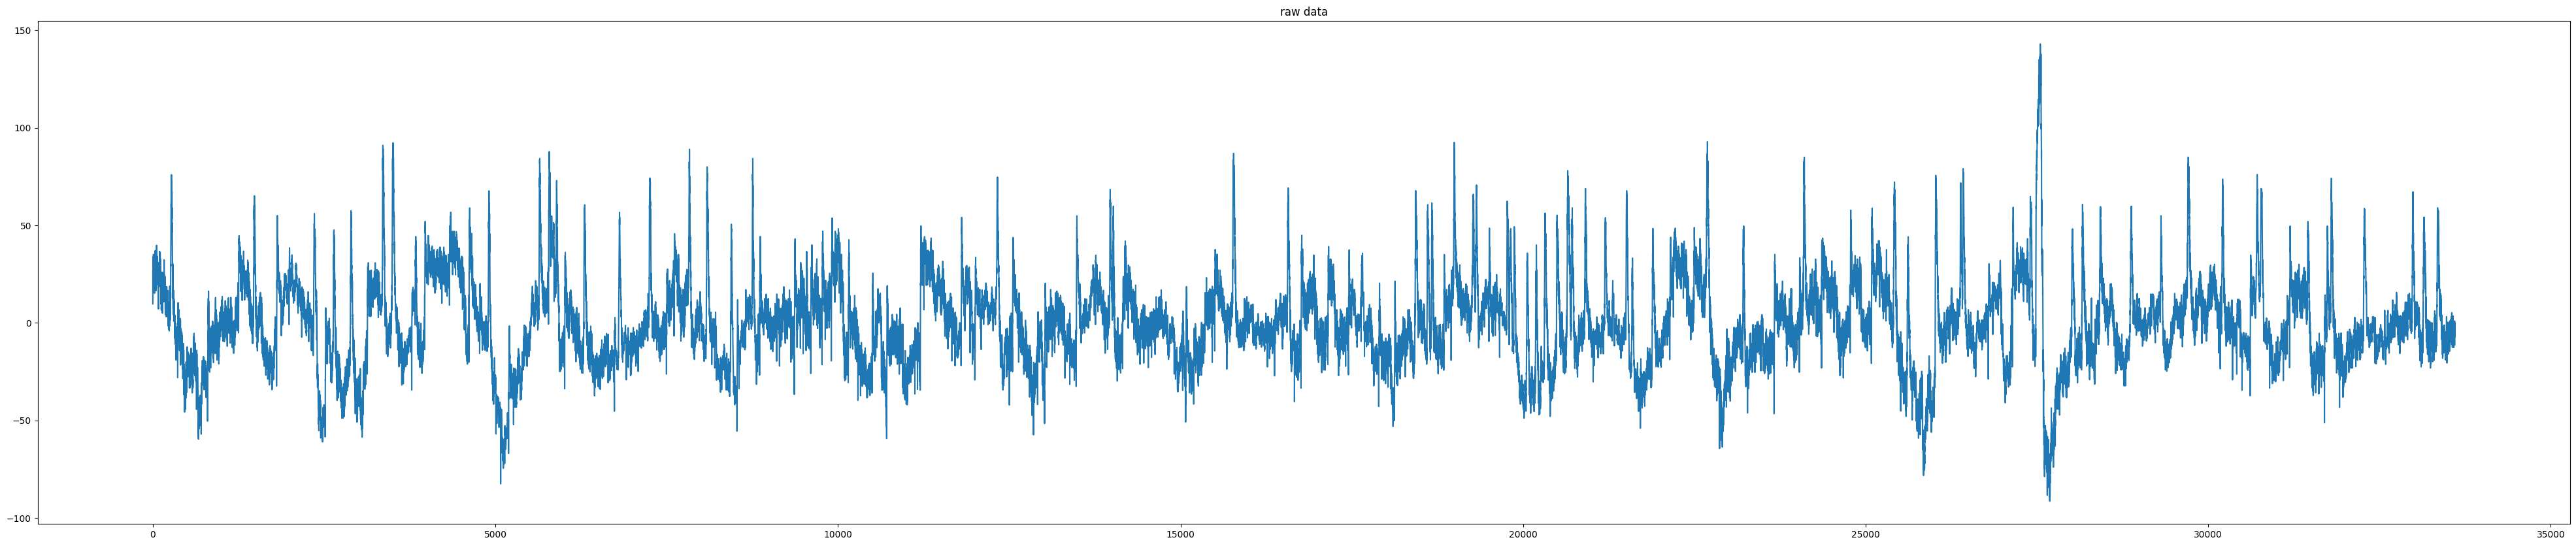

In [71]:
plot_time(sig)